# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [ ]:
!pip install --user --upgrade tables
!pip install --user pycaret

  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


In [ ]:
# !pip install pycaret[full]==2.3.4
!pip install pycaret

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install or upgrade required libraries
!pip install pandas scikit-learn

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [ ]:
csv_file_path = '/content/drive/MyDrive/MS thesis/HFCAI/RG1/rg1-HCFAI-popdensum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)
df

,fid,RHU_Presence,Road_Presence,POI_Presence,buildability_landcov,Distance_to_Nearest_RHU_km,Nearest_RHU,Neighbors3,admin_boun,bg_name,...,drought_value,popden_eld,flood_probability_value,popden_all,pr_name,rain_intensity_value,popden_wom,popden_w_1,popden_you,HCFAI
0,2865422,0,0,0,1.0,29.847534,2877844,"2865422, 2866804",bg-2303,Ilio-ilio (Iliw-iliw),...,1.166831,0.000000,0.934144,0.000000,Pangasinan,1.178482,0.000000,0.000000,0.000000,0.500000
1,2866789,0,0,0,1.0,11.042224,2877844,"2866789, 2866790",bg-1910,Macaboboni,...,1.180281,1.229901,0.734487,18.858487,Pangasinan,1.099466,9.052743,4.451071,3.355037,0.513517
2,2866790,0,0,0,0.0,11.392127,2877844,"2866790, 2866791",bg-1910,Macaboboni,...,1.180281,0.000000,0.734487,0.000000,Pangasinan,1.099466,0.000000,0.000000,0.000000,0.500000
3,2866791,0,0,0,0.0,12.122822,2877844,2866791,bg-1910,Macaboboni,...,1.180281,0.000000,0.734487,0.000000,Pangasinan,1.099466,0.000000,0.000000,0.000000,0.500000
4,2866795,0,0,1,0.0,15.836811,2877844,2866795,bg-1903,Aloleng,...,1.221725,1.063497,1.089602,13.017208,Pangasinan,1.154037,6.380984,2.983110,2.217392,0.420395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,2992394,0,0,1,1.0,20.940640,2971664,2992394,bg-335,Pasaleng,...,0.797894,0.000000,1.438344,0.000000,Ilocos Norte,2.648136,0.000000,0.000000,0.000000,0.500000
5725,2992395,0,0,1,1.0,20.940735,2971664,"2992395, 2991013, 2992394",bg-335,Pasaleng,...,0.797894,0.000000,1.438344,0.000000,Ilocos Norte,2.648136,0.000000,0.000000,0.000000,0.500000
5726,2992396,0,0,1,1.0,21.033190,2971664,"2992396, 2991014, 2992396, 2991014, 2992395",bg-1,Adams (Pob.),...,0.791358,0.000000,0.591382,0.000000,Ilocos Norte,2.749202,0.000000,0.000000,0.000000,0.500000
5727,2992397,0,0,0,1.0,21.185258,2971664,"2992397, 2991015",bg-1,Adams (Pob.),...,0.791358,0.000000,0.591382,0.000000,Ilocos Norte,2.749202,0.000000,0.000000,0.000000,0.500000


In [ ]:
df = df.rename(columns={'fid': 'ID'})
for i in df.columns:
  print(i)

ID
RHU_Presence
Road_Presence
POI_Presence
buildability_landcov
Distance_to_Nearest_RHU_km
Nearest_RHU
Neighbors3
admin_boun
bg_name
popden_chi
cm_name
drought_value
popden_eld
flood_probability_value
popden_all
pr_name
rain_intensity_value
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

In [ ]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,2865422
1,2866789
2,2866790
3,2866791
4,2866795
...,...
5724,2992394
5725,2992395
5726,2992396
5727,2992397


In [ ]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(5729, 1)"
2,Transformed data shape,"(5729, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


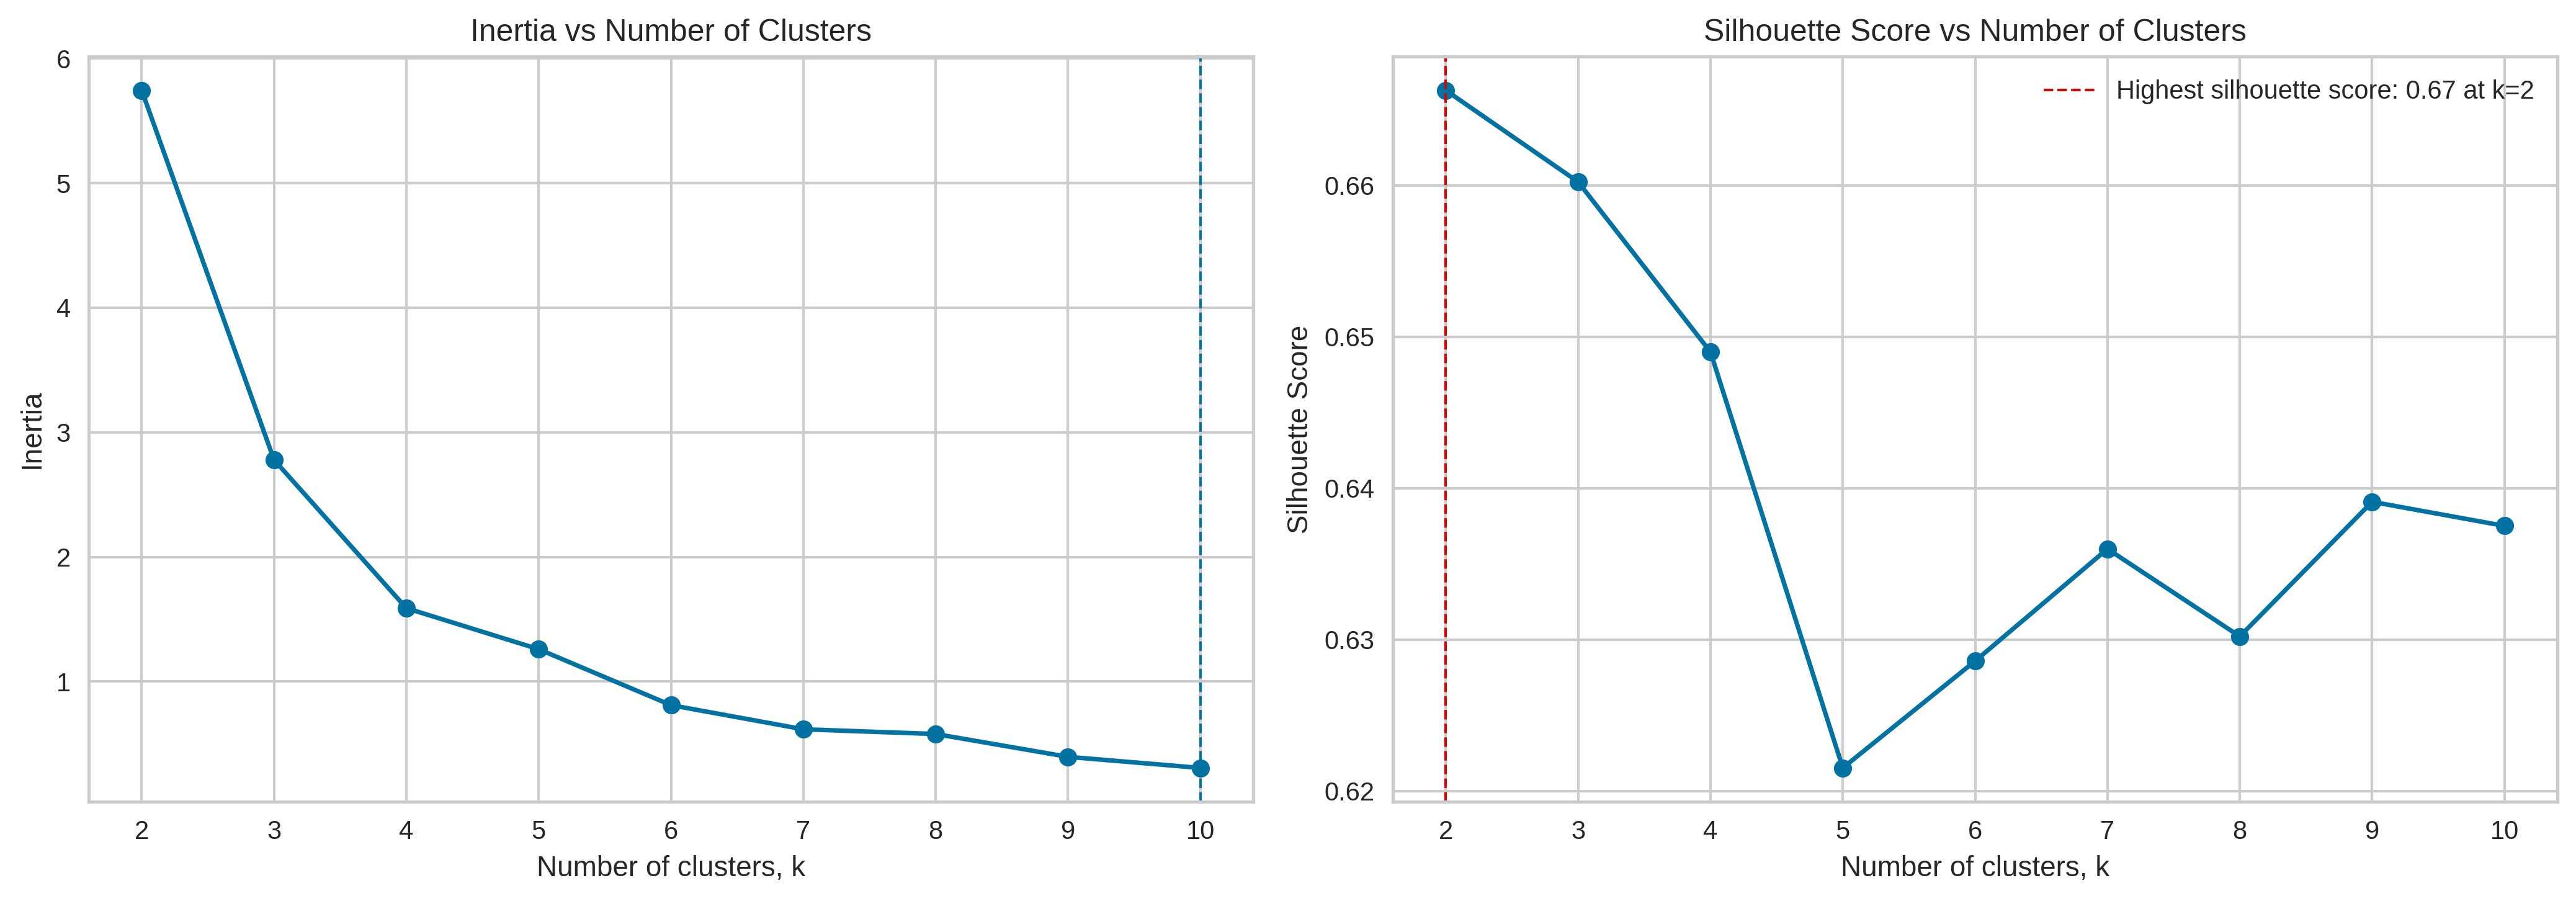

In [ ]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6484,22524.9645,0.4879,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

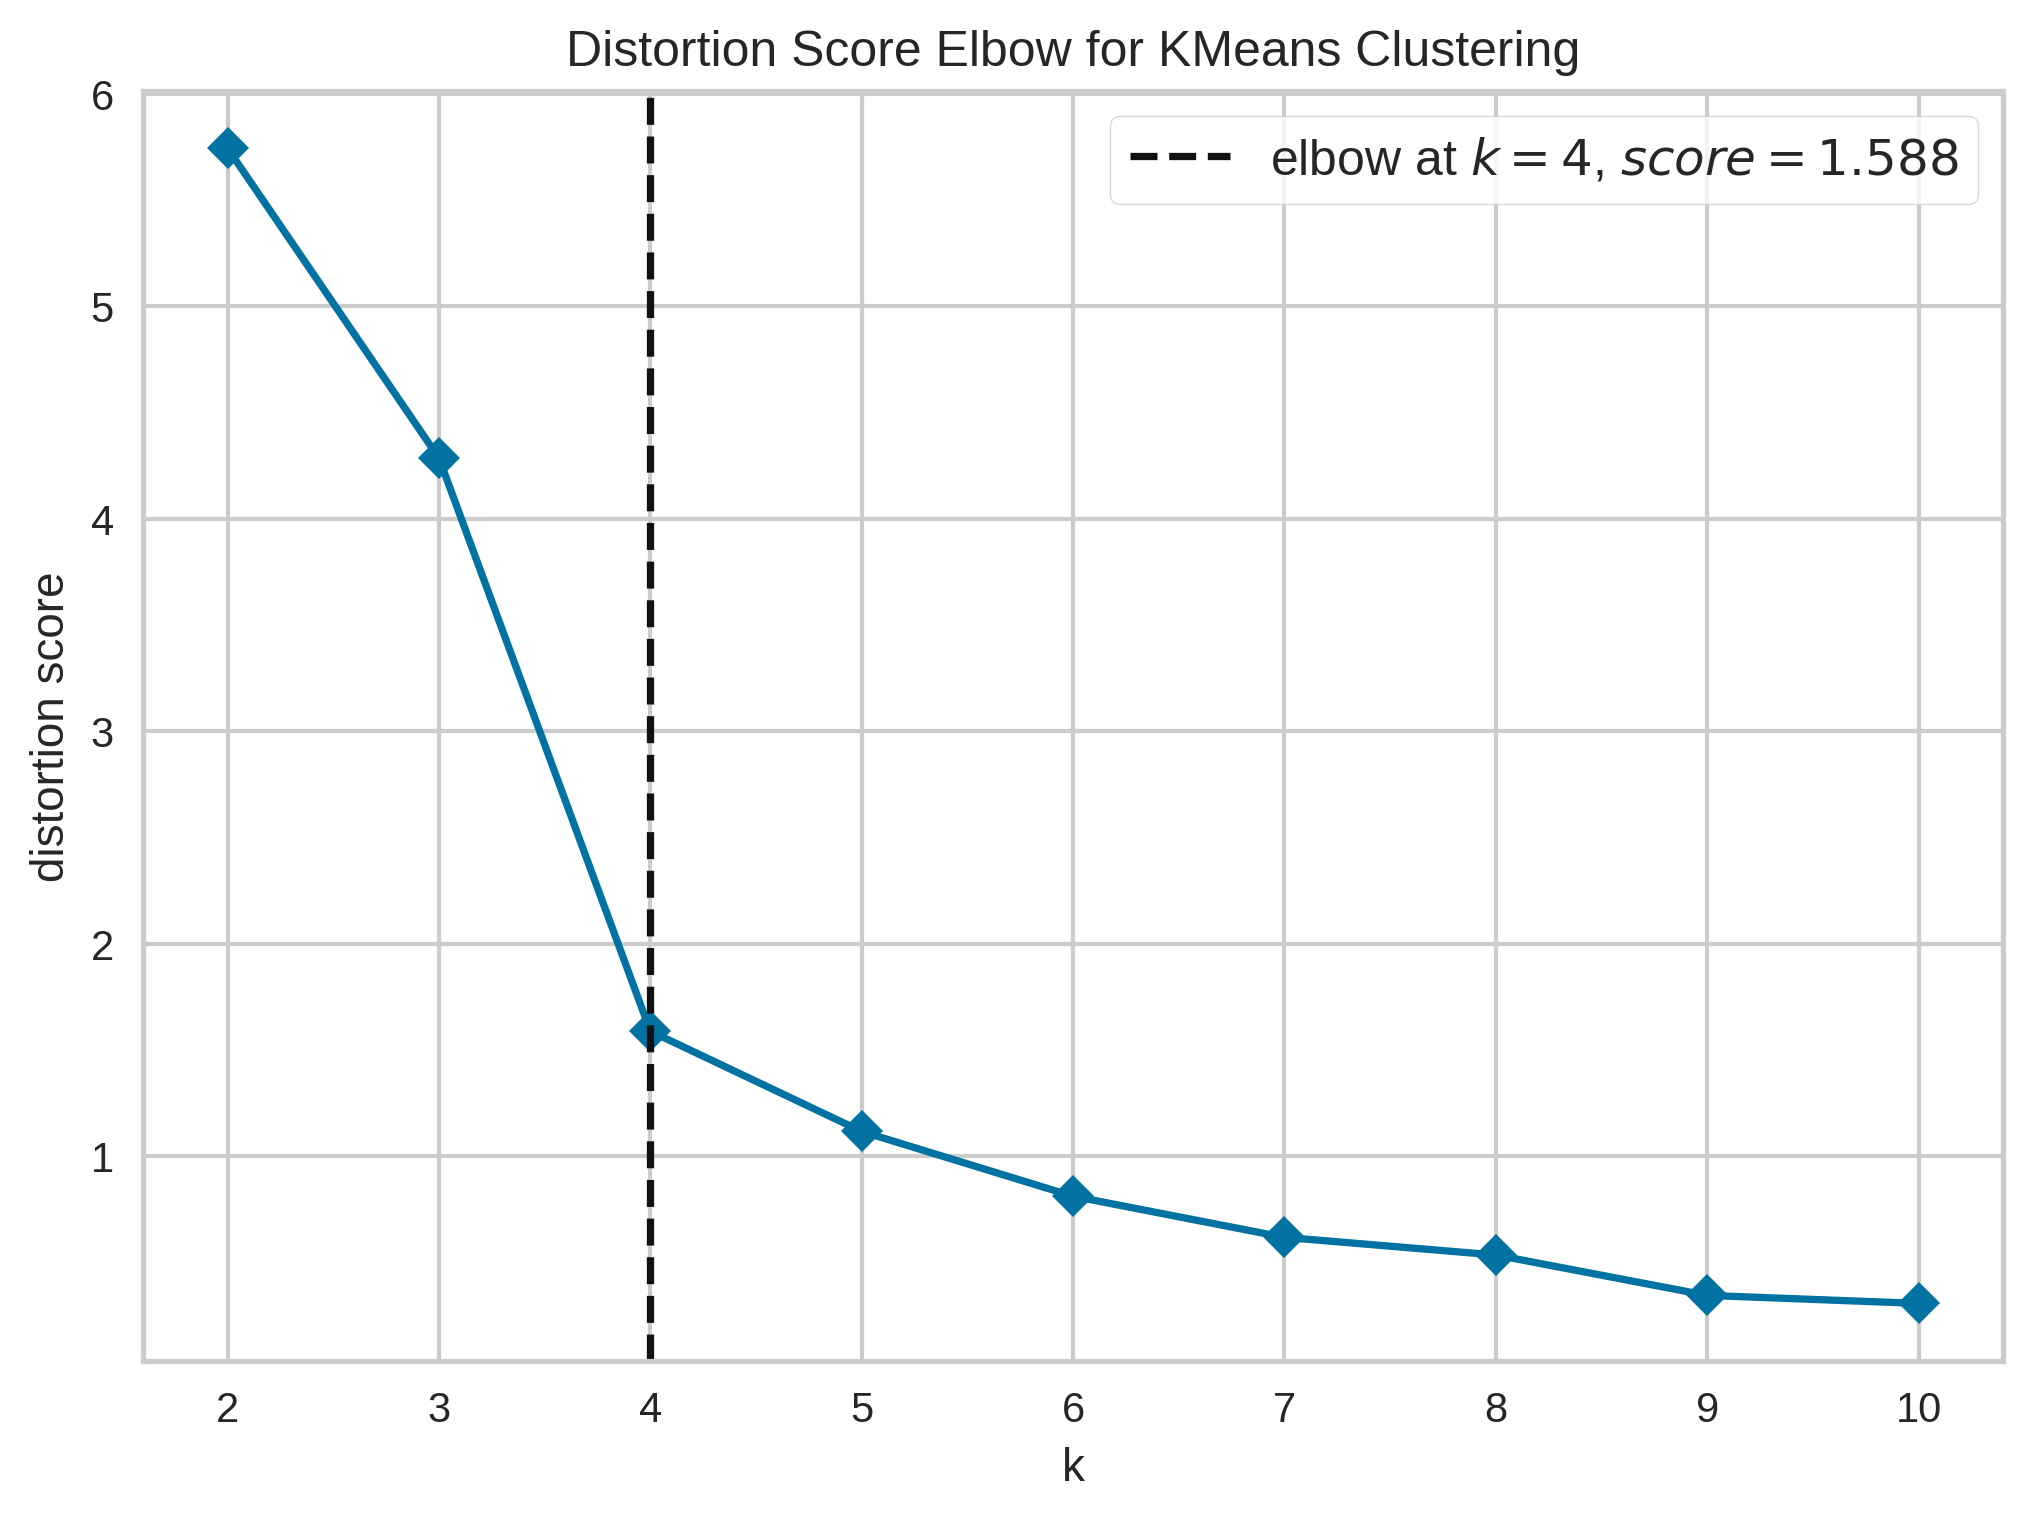

In [ ]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [ ]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [ ]:
model = create_model('kmeans', num_clusters = 2)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, 'Region1-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6662,14545.3337,0.4855,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 1
1,0.513517,Cluster 1
2,0.500000,Cluster 1
3,0.500000,Cluster 1
4,0.420395,Cluster 0
5,0.500000,Cluster 1
6,0.500000,Cluster 1
7,0.500171,Cluster 1
8,0.500000,Cluster 1
9,0.500000,Cluster 1


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results

,HCFAI,Cluster
0,0.500000,Cluster 3
1,0.513517,Cluster 3
2,0.500000,Cluster 3
3,0.500000,Cluster 3
4,0.420395,Cluster 0
...,...,...
5724,0.500000,Cluster 3
5725,0.500000,Cluster 3
5726,0.500000,Cluster 3
5727,0.500000,Cluster 3


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(4):  # Assuming you have 3 clusters
    cluster_name = f"Cluster {cluster_number}"
    cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
    lists[cluster_name] = cluster_list

In [ ]:
for cluster_name, cluster_list in lists.items():
    print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

Cluster Cluster 0: [0.4203945994377136, 0.4203945994377136, 0.4203945994377136, 0.43540510535240173, 0.43540510535240173, 0.43540510535240173, 0.4670698344707489, 0.4671897292137146, 0.4625442326068878, 0.4159274399280548, 0.4159274399280548, 0.4159274399280548, 0.4476374387741089, 0.4434128403663635, 0.4433159828186035, 0.4433159828186035, 0.42182838916778564, 0.4174562692642212, 0.4492081105709076, 0.4514169692993164, 0.44390228390693665, 0.4491739571094513, 0.4514169692993164, 0.4514169692993164, 0.44492417573928833, 0.4574970006942749, 0.44390228390693665, 0.44390228390693665, 0.44390228390693665, 0.4445345997810364, 0.4445345997810364, 0.4366820454597473, 0.44390228390693665, 0.44390228390693665, 0.44533178210258484, 0.44533178210258484, 0.44860535860061646, 0.44860535860061646, 0.4526337683200836, 0.44621381163597107, 0.44621381163597107, 0.4165114760398865, 0.4174562692642212, 0.43826600909233093, 0.4344707727432251, 0.4344707727432251, 0.44860535860061646, 0.4165114760398865, 0

In [ ]:
x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

,HCFAI,Accessibility Level
5201,0.660222,Cluster 1
5204,0.654712,Cluster 1
5048,0.653702,Cluster 1
1121,0.649558,Cluster 1
4970,0.645941,Cluster 1
...,...,...
3090,0.337049,Cluster 2
3213,0.335817,Cluster 2
2961,0.335170,Cluster 2
4500,0.332384,Cluster 2


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(1))
x = x.replace(['Cluster 2'],int(0))
x = x.replace(['Cluster 3'],int(0))

In [ ]:
x['ID'] = IDdf
x['ID'].unique()

array([2865422, 2866789, 2866790, ..., 2992396, 2992397, 2992418])

In [ ]:
df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
df

,ID,RHU_Presence,Road_Presence,POI_Presence,buildability_landcov,Distance_to_Nearest_RHU_km,Nearest_RHU,Neighbors3,admin_boun,bg_name,...,flood_probability_value,popden_all,pr_name,rain_intensity_value,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI_y,Accessibility Level
0,2865422,0,0,0,1.0,29.847534,2877844,"2865422, 2866804",bg-2303,Ilio-ilio (Iliw-iliw),...,0.934144,0.000000,Pangasinan,1.178482,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,2866789,0,0,0,1.0,11.042224,2877844,"2866789, 2866790",bg-1910,Macaboboni,...,0.734487,18.858487,Pangasinan,1.099466,9.052743,4.451071,3.355037,0.513517,0.513517,0
2,2866790,0,0,0,0.0,11.392127,2877844,"2866790, 2866791",bg-1910,Macaboboni,...,0.734487,0.000000,Pangasinan,1.099466,0.000000,0.000000,0.000000,0.500000,0.500000,0
3,2866791,0,0,0,0.0,12.122822,2877844,2866791,bg-1910,Macaboboni,...,0.734487,0.000000,Pangasinan,1.099466,0.000000,0.000000,0.000000,0.500000,0.500000,0
4,2866795,0,0,1,0.0,15.836811,2877844,2866795,bg-1903,Aloleng,...,1.089602,13.017208,Pangasinan,1.154037,6.380984,2.983110,2.217392,0.420395,0.420395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,2992394,0,0,1,1.0,20.940640,2971664,2992394,bg-335,Pasaleng,...,1.438344,0.000000,Ilocos Norte,2.648136,0.000000,0.000000,0.000000,0.500000,0.500000,0
5725,2992395,0,0,1,1.0,20.940735,2971664,"2992395, 2991013, 2992394",bg-335,Pasaleng,...,1.438344,0.000000,Ilocos Norte,2.648136,0.000000,0.000000,0.000000,0.500000,0.500000,0
5726,2992396,0,0,1,1.0,21.033190,2971664,"2992396, 2991014, 2992396, 2991014, 2992395",bg-1,Adams (Pob.),...,0.591382,0.000000,Ilocos Norte,2.749202,0.000000,0.000000,0.000000,0.500000,0.500000,0
5727,2992397,0,0,0,1.0,21.185258,2971664,"2992397, 2991015",bg-1,Adams (Pob.),...,0.591382,0.000000,Ilocos Norte,2.749202,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,RHU_Presence,Road_Presence,POI_Presence,buildability_landcov,Distance_to_Nearest_RHU_km,Nearest_RHU,Neighbors3,admin_boun,bg_name,...,flood_probability_value,popden_all,pr_name,rain_intensity_value,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,2865422,0,0,0,1.0,29.847534,2877844,"2865422, 2866804",bg-2303,Ilio-ilio (Iliw-iliw),...,0.934144,0.000000,Pangasinan,1.178482,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,2866789,0,0,0,1.0,11.042224,2877844,"2866789, 2866790",bg-1910,Macaboboni,...,0.734487,18.858487,Pangasinan,1.099466,9.052743,4.451071,3.355037,0.513517,0.513517,0
2,2866790,0,0,0,0.0,11.392127,2877844,"2866790, 2866791",bg-1910,Macaboboni,...,0.734487,0.000000,Pangasinan,1.099466,0.000000,0.000000,0.000000,0.500000,0.500000,0
3,2866791,0,0,0,0.0,12.122822,2877844,2866791,bg-1910,Macaboboni,...,0.734487,0.000000,Pangasinan,1.099466,0.000000,0.000000,0.000000,0.500000,0.500000,0
4,2866795,0,0,1,0.0,15.836811,2877844,2866795,bg-1903,Aloleng,...,1.089602,13.017208,Pangasinan,1.154037,6.380984,2.983110,2.217392,0.420395,0.420395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,2992394,0,0,1,1.0,20.940640,2971664,2992394,bg-335,Pasaleng,...,1.438344,0.000000,Ilocos Norte,2.648136,0.000000,0.000000,0.000000,0.500000,0.500000,0
5725,2992395,0,0,1,1.0,20.940735,2971664,"2992395, 2991013, 2992394",bg-335,Pasaleng,...,1.438344,0.000000,Ilocos Norte,2.648136,0.000000,0.000000,0.000000,0.500000,0.500000,0
5726,2992396,0,0,1,1.0,21.033190,2971664,"2992396, 2991014, 2992396, 2991014, 2992395",bg-1,Adams (Pob.),...,0.591382,0.000000,Ilocos Norte,2.749202,0.000000,0.000000,0.000000,0.500000,0.500000,0
5727,2992397,0,0,0,1.0,21.185258,2971664,"2992397, 2991015",bg-1,Adams (Pob.),...,0.591382,0.000000,Ilocos Norte,2.749202,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
# df = df.drop(['HCFAI_x'], axis=1)
# df = df.drop(['Accessibility Level_x','Accessibility Level_y', 'HCFAI'], axis=1)
df.to_csv(r'/content/drive/MyDrive/MS thesis/preliminary site selection/RG1/rg1-clusters-popdensum.csv')

# Clustering using all region 1 data

,Description,Value
0,Session id,7652
1,Original data shape,"(4701, 22)"
2,Transformed data shape,"(4701, 6041)"
3,Numeric features,18
4,Categorical features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6990,9670.7545,0.5602,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

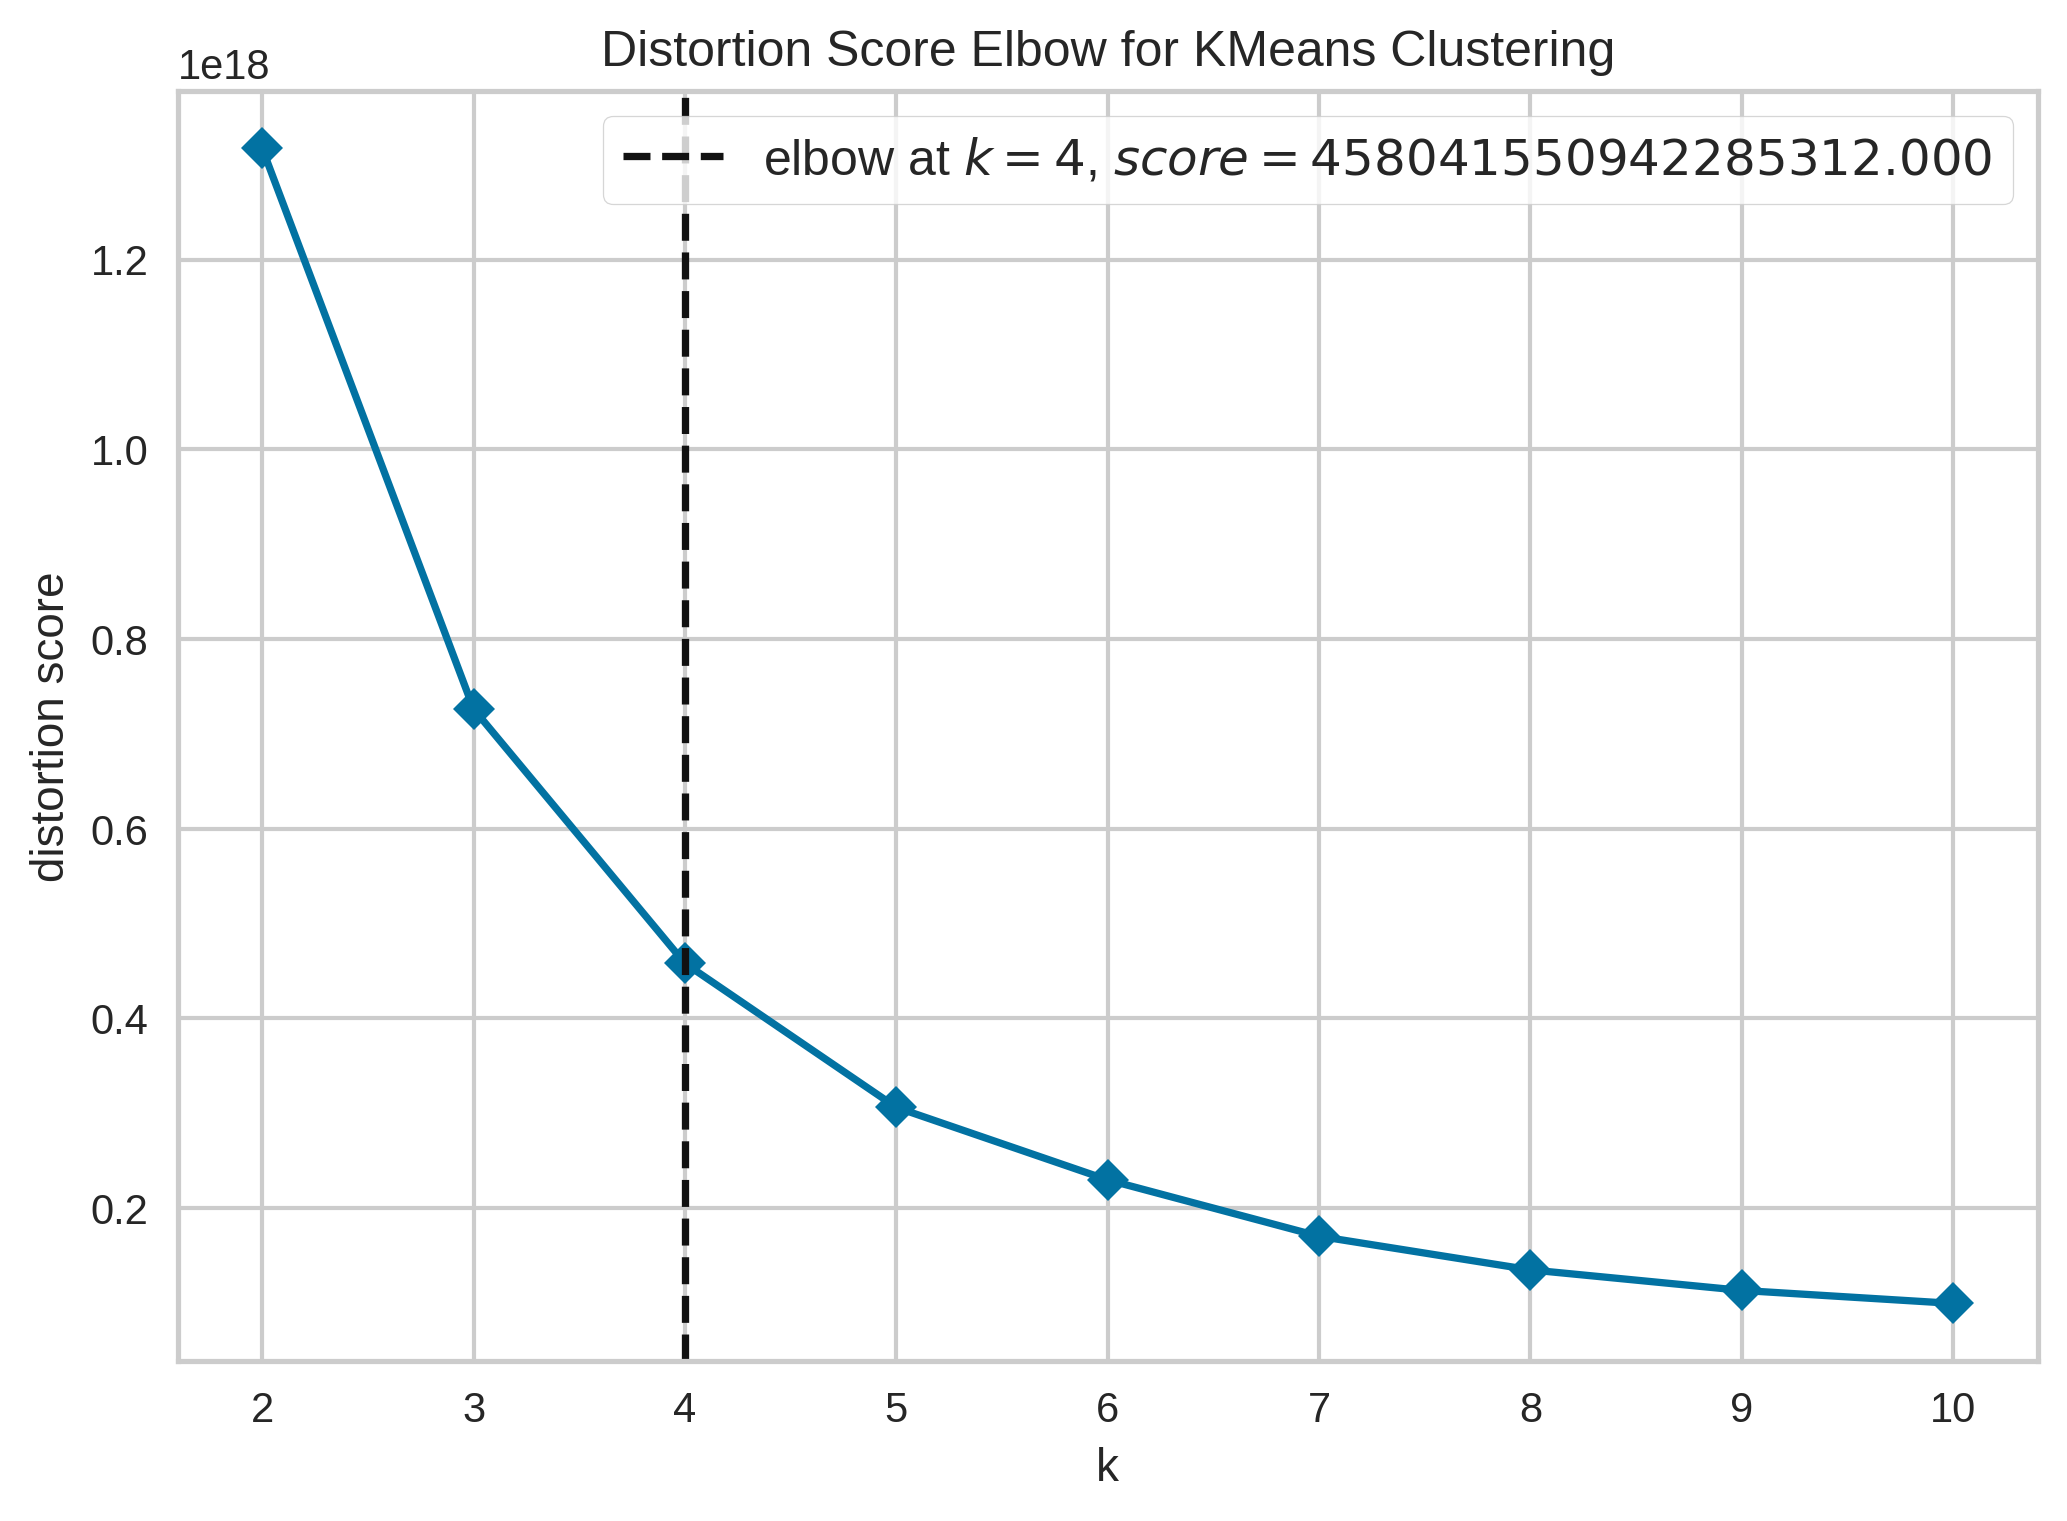

In [ ]:
cluster = setup(df, session_id = 7652)
model = create_model('kmeans')
plot_model(model, 'elbow')

In [ ]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
plot_model(model, 'cluster')
save_model(model, 'Region1-Clusters')
rg1_results = assign_model(model)
rg1_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6990,9670.7545,0.5602,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,population_children_under5,population_elder60plus,population_women,population_youth,population_reproductive_women,popden_all_total_population,Neighbors,HCFAI,Cluster
0,2865422,Ilio-ilio (Iliw-iliw),Burgos,Pangasinan,0.934144,1.178482,0.740358,1.0,0,0,...,29.847534,0.000000,0.000000,0.00000,0.000000,0.000000,4.064488e+05,"2944105, 2944105, 2945487, 2944106, 2945487, 2...",0.500010,Cluster 0
1,2866789,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,1.0,0,0,...,11.042224,14927.853516,7242.223145,53306.71875,19756.001953,26209.955078,1.697446e+06,"2944105, 2945487, 2944106, 2945487, 2944107, 2...",0.500016,Cluster 0
2,2866790,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,0.0,0,0,...,11.392127,0.000000,0.000000,0.00000,0.000000,0.000000,2.819701e+06,"2942723, 2942723, 2941342, 2942722, 2941341, 2...",0.499935,Cluster 0
3,2866791,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,0.0,0,0,...,12.122822,0.000000,0.000000,0.00000,0.000000,0.000000,4.244968e+06,"2956481, 2956481, 2956481, 2956481, 2956481, 2...",0.499960,Cluster 0
4,2866795,Aloleng,Agno,Pangasinan,1.089602,1.154037,0.779155,0.0,0,0,...,15.836811,105878.718750,69201.750000,415210.62500,144285.703125,194110.968750,7.493846e+05,"2956481, 2956481, 2956481, 2956481, 2957864, 2...",0.499835,Cluster 0
5,2866796,Magsaysay,Agno,Pangasinan,0.700863,1.151206,0.800627,0.0,0,0,...,16.685263,0.000000,0.000000,0.00000,0.000000,0.000000,4.021250e+03,"2956481, 2956481, 2956481, 2957864, 2956482, 2...",0.467737,Cluster 0
6,2866797,Tupa,Agno,Pangasinan,0.952087,1.147433,0.793311,1.0,0,0,...,18.265360,0.000000,0.000000,0.00000,0.000000,0.000000,1.469673e+05,"2971765, 2971764, 2971766, 2970382, 2970383, 2...",0.499971,Cluster 0
7,2866798,Gayusan,Agno,Pangasinan,0.853295,1.143231,0.787825,1.0,0,0,...,20.012033,119328.359375,152214.093750,540266.06250,167247.546875,236777.453125,1.637830e+06,"2971764, 2970382, 2970381, 2971764, 2970381, 2...",0.500001,Cluster 0
8,2866799,Gayusan,Agno,Pangasinan,0.853295,1.143231,0.787825,0.0,0,0,...,21.284109,0.000000,0.000000,0.00000,0.000000,0.000000,3.716372e+06,"2971766, 2971767, 2970383, 2970384",0.499971,Cluster 0
9,2866800,Baruan,Agno,Pangasinan,0.926651,1.173055,0.762978,0.0,0,0,...,22.080393,0.000000,0.000000,0.00000,0.000000,0.000000,8.700532e+05,"2971767, 2971768, 2970384, 2970385",0.499882,Cluster 0


In [ ]:
rg1_results.rename(columns = {'Cluster':'Accessibility Level'}, inplace = True)
low = []
midlow = []
midhigh = []
high = []

for x in range(5729):
    if rg1_results['Accessibility Level'][x] == "Cluster 0":
        midlow.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 1":
        low.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 2":
        high.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 3":
        midhigh.append(rg1_results["HCFAI"][x])

KeyError: 4701

In [ ]:
print(f'CLUSTER 1 - Max: {max(low)} min: {min(low)} total number: {len(low)}')
print(f'CLUSTER 0 - Max: {max(midlow)} min: {min(midlow)} total number: {len(midlow)}')
print(f'CLUSTER 2 - Max: {max(high)} min: {min(high)} total number: {len(high)}')
print(f'CLUSTER 3 - Max: {max(midhigh)} min: {min(midhigh)} total number: {len(midhigh)}')

In [ ]:
mid_to_high = []
for i in list(df['HCFAI']):
    if i >= 0.53:
        mid_to_high.append(i)

# Assuming original_df is your original DataFrame
filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
print(filtered_original_df)